<a href="https://colab.research.google.com/github/jjlee6496/one-by-one/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제1 : class별 생존자수를 비교하고 (시각화포함), 통계적으로 유의한 차이인지 분석하시오

survived    0    1
pclass            
1          80  136
2          97   87
3         372  119


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4af1c6d510>,
      dtype=object)

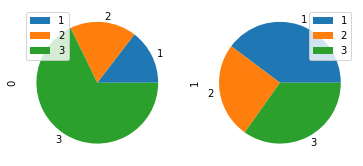

In [35]:
import seaborn as sns
import pandas as pd
from scipy import stats


titanic= sns.load_dataset("titanic")
ct=pd.crosstab(titanic['pclass'], titanic['survived'])
print(ct)
ct.plot.pie(subplots=True)

분할표, pie chart를 봤을때 class3이 눈으로 보기에도 생존하지 못할 확률이 높다

In [4]:
stats.chi2_contingency(ct)

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

p값이 매우 작기때문에 클래스별 생존율이 통계적으로 유의한 차이가 있다고 할 수 있다.

# 과제2 : 출발도시에 따라 탑승객 연령의 차이가 있는지 분석하시오. 시각화 포함

embarked
C    30.814769
Q    28.089286
S    29.445397
Name: age, dtype: float64


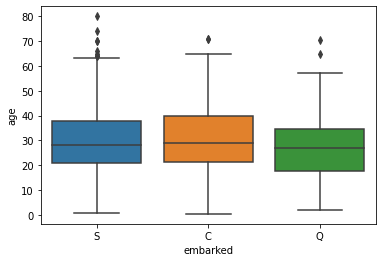

In [33]:
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

titanic= sns.load_dataset("titanic")
print(titanic.groupby('embarked').age.mean())
sns.boxplot(x='embarked', y='age', data=titanic)

출발도시에 따른 평균의 차이가 거의 없어 보인다.

In [28]:
model=ols('age~embarked', titanic).fit()
print (anova_lm(model))

             df         sum_sq     mean_sq        F    PR(>F)
embarked    2.0     267.719790  133.859895  0.63664  0.529369
Residual  709.0  149074.349191  210.260013      NaN       NaN


p값이 0.05보다 크므로 기각 불가. 즉 출발 도시에 따라 탑승객 연령의 차이가 없다.

# 과제3 : red wine 데이터("winequaility-red.csv")에서 quality 변수와 가장 상관관계가 높은 변수를 찾으시오. 시각화, 과정 포함

In [49]:
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt


red_df = pd.read_csv("winequality-red.csv", sep=";")
red_df.insert(0, column='type', value='red')

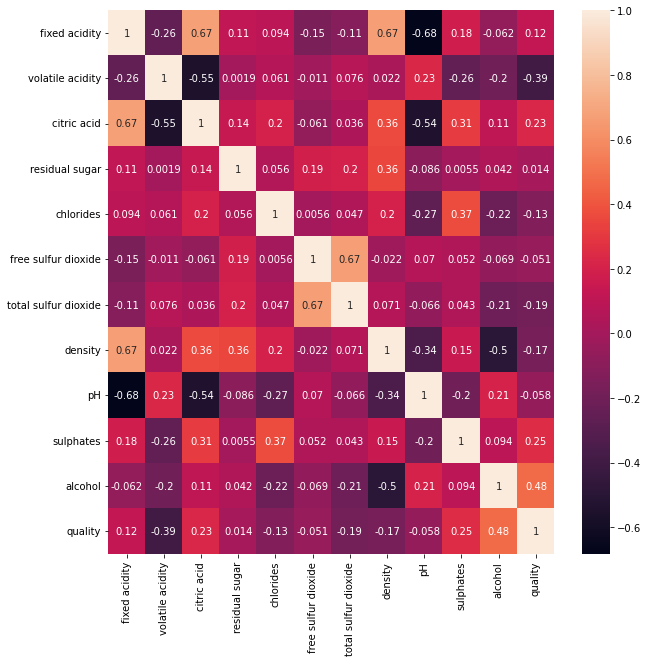

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(red_df.corr(),annot=True)

수치와 히트맵을 봤을 때 양의 quality와 양의 상관관계가 alcohol 변수와 0.48로 가장 높고   
음의상관관계는 volatile acidity가 -0.39로 가장 높다

In [45]:
stats.spearmanr(red_df.quality,red_df.alcohol)

SpearmanrResult(correlation=0.4785316874702435, pvalue=2.7268377398472646e-92)

스피어만 상관계수도 0.47로 0.48과 비슷하다.

# 과제 4 : 0-4999 번 데이터로 중선형회귀 모델을 만들고 5000~ 데이터를 예측하시오

In [56]:
import pandas as pd
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

#데이터 병합
red_df = pd.read_csv("winequality-red.csv", sep=";")
red_df.insert(0, column='type', value='red')
white_df= pd.read_csv("winequality-white.csv", sep=";")
white_df.insert(0, column='type', value='white')
wine=pd.concat([red_df, white_df])

In [58]:
#컬럼명 공백제거
wine.columns = [c.replace(' ', '_') for c in wine.columns]
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [68]:
# quality변수를 뺀 나머지를 fomula에 맞게 가공
all_cols = "+".join(wine.columns.difference(['quality']))
formula = "quality~"+all_cols
formula

'quality~alcohol+chlorides+citric_acid+density+fixed_acidity+free_sulfur_dioxide+pH+residual_sugar+sulphates+total_sulfur_dioxide+type+volatile_acidity'

In [65]:
#예측 결과
m1 = ols (formula, data=wine[:5000]).fit()
m1.predict( wine[5000:])

3401    5.0
3402    6.0
3403    5.0
3404    6.0
3405    6.0
       ... 
4893    6.0
4894    5.0
4895    6.0
4896    7.0
4897    6.0
Length: 1497, dtype: float64

In [69]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.613e+28
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:25:42   Log-Likelihood:             1.4413e+05
No. Observations:                5000   AIC:                        -2.882e+05
Df Residuals:                    4986   BIC:                        -2.881e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              1.99e-13   1.51e-12      0.132      0.895   -2.76e-12    3.16e-12
type[T.white]        -3.575e-14   6.05e-15     -5.908      0.000   -4.76e-14   -2.39e-14
alcohol              -4.996e-16   1.97e-15     -0.254      0.799   -4.35e-15    3.36e-15
chlorides             3.553e-15   3.57e-14      0.100      0.921   -6.63e-14    7.34e-14
citric_acid            2.72e-15   8.88e-15      0.306      0.760   -1.47e-14    2.01e-14
density              -2.274e-13   1.53e-12     -0.148      0.882   -3.23e-12    2.78e-12
fixed_acidity          1.11e-16   1.72e-15      0.065      0.948   -3.26e-15    3.48e-15
free_sulfur_dioxide    4.51e-17   9.33e-17      0.483      0.629   -1.38e-16    2.28e-16
pH                            0   1.03e-14          0      1.000   -2.02e-14    2.02e-14
quality                  1.0000    1.4e-15   7.12e+14      0.000       1.000       1.000
residual_sugar       -1.443e-15   6.55e-16     -2.203      0.028   -2.73e-15   -1.59e-16
sulphates            -3.331e-16   8.63e-15     -0.039      0.969   -1.73e-14    1.66e-14
total_sulfur_dioxide -1.596e-16    3.7e-17     -4.310      0.000   -2.32e-16    -8.7e-17
volatile_acidity      2.665e-15   9.15e-15      0.291      0.771   -1.53e-14    2.06e-14
==============================================================================
Omnibus:                     4684.681   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.376
Skew:                          -0.383   Prob(JB):                     2.59e-93
Kurtosis:                       1.792   Cond. No.                     2.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

summary 결과 type, residual_sugar,total_sulfur_dioxide만 유의해서 모델 변경

In [77]:
# 유의한 변수만 넣고 예측
formula2 = "quality~type+residual_sugar+total_sulfur_dioxide"
m2 = ols (formula2, data=wine[:5000]).fit()
m2.predict( wine[5000:])

3401    5.947643
3402    5.880673
3403    6.019466
3404    6.062019
3405    5.977203
          ...   
4893    6.066796
4894    5.762838
4895    6.004564
4896    6.008673
4897    6.051778
Length: 1497, dtype: float64

In [78]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     76.65
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.81e-48
Time:                        02:36:21   Log-Likelihood:                -6378.6
No. Observations:                5000   AIC:                         1.277e+04
Df Residuals:                    4996   BIC:                         1.279e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8124      0.026    224.548      0.000       5.762       5.863
type[T.white]            0.5800      0.039     14.853      0.000       0.503       0.657
residual_sugar          -0.0069      0.003     -2.212      0.027      -0.013      -0.001
total_sulfur_dioxide    -0.0034      0.000    -10.448      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       33.553   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.292
Skew:                           0.104   Prob(JB):                     3.97e-10
Kurtosis:                       3.406   Cond. No.                         405.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

계수들의 유의성이 모두 유의하다고 나왔지만 모델의 설명력은 부족해 보임  
과제3에서 상관관계가 높았던 변수들 추가하고 유의한 계수들만 남기기

In [91]:
formula3 = "quality~type+residual_sugar+volatile_acidity+alcohol+sulphates+density+chlorides"
m3 = ols (formula3, data=wine[:5000]).fit()
m3.predict( wine[5000:])

3401    6.283169
3402    5.632380
3403    6.244445
3404    6.265018
3405    5.963146
          ...   
4893    6.200085
4894    5.576623
4895    5.497090
4896    6.594369
4897    6.315762
Length: 1497, dtype: float64

In [92]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     295.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:39:40   Log-Likelihood:                -5623.3
No. Observations:                5000   AIC:                         1.126e+04
Df Residuals:                    4992   BIC:                         1.131e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           55.4346      9.488      5.843      0.000      36.834      74.035
type[T.white]       -0.3122      0.050     -6.272      0.000      -0.410      -0.215
residual_sugar       0.0392      0.005      8.698      0.000       0.030       0.048
volatile_acidity    -1.4355      0.082    -17.453      0.000      -1.597      -1.274
alcohol              0.2976      0.015     20.483      0.000       0.269       0.326
sulphates            0.8068      0.085      9.460      0.000       0.640       0.974
density            -52.8423      9.435     -5.600      0.000     -71.340     -34.345
chlorides           -1.1737      0.350     -3.349      0.001      -1.861      -0.487
==============================================================================
Omnibus:                       87.220   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.275
Skew:                          -0.019   Prob(JB):                     8.70e-39
Kurtosis:                       3.916   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

결정계수가 약 0.3으로 조금 높아졌고 계수들 모두 유의하다

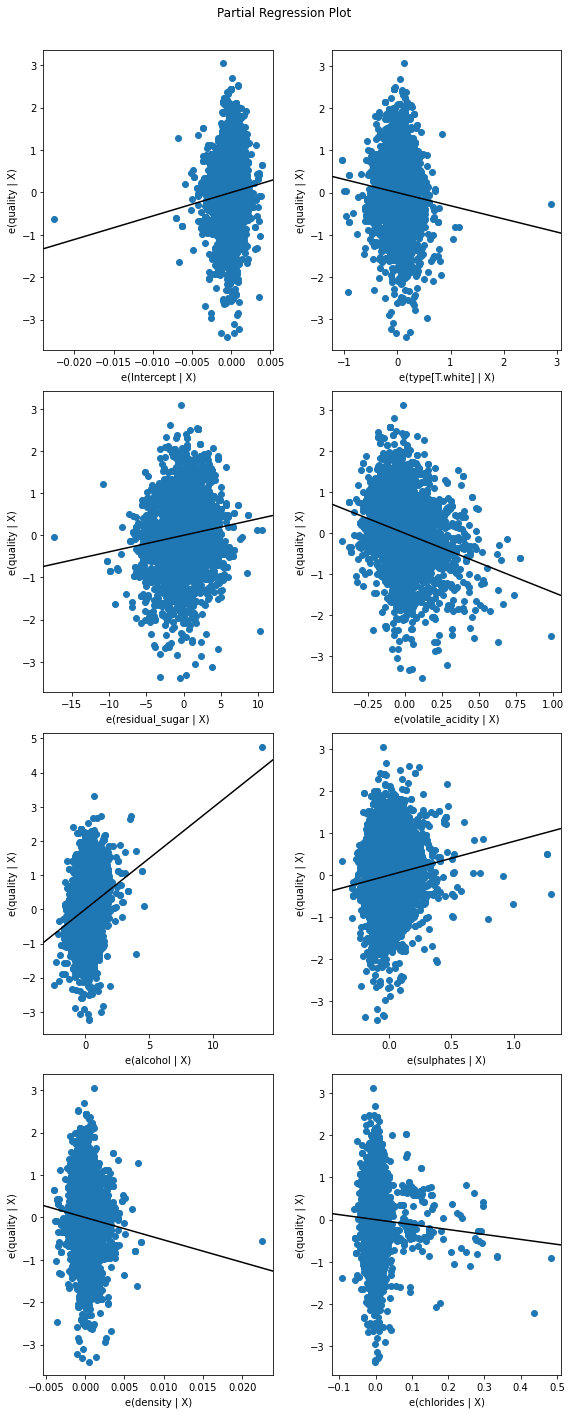

In [98]:
#시각화 
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig = plt.figure(figsize=(8, 20))
plot_partregress_grid(m3, fig=fig)
plt.show()